In [30]:
import xml.etree.ElementTree as ET
import os

def convert_pascalvoc_to_yolo(pascal_dir, output_dir, class_list):
    for filename in os.listdir(pascal_dir):
        if filename.endswith('.xml'):
            # Read the XML annotation file
            xml_path = os.path.join(pascal_dir, filename)
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Extract image size
            width = int(root.find('size/width').text)
            height = int(root.find('size/height').text)

            # Create the YOLO annotation file
            yolo_path = os.path.join(output_dir, filename.replace('.xml', '.txt'))
            with open(yolo_path, 'w') as file:
                for obj in root.findall('object'):
                    # Extract object class and bounding box coordinates
                    class_name = obj.find('name').text
                    class_index = class_list.index(class_name)

                    bbox = obj.find('bndbox')
                    xmin = int(bbox.find('xmin').text)
                    ymin = int(bbox.find('ymin').text)
                    xmax = int(bbox.find('xmax').text)
                    ymax = int(bbox.find('ymax').text)

                    # Convert coordinates to YOLO format
                    x_center = (xmin + xmax) / (2.0 * width)
                    y_center = (ymin + ymax) / (2.0 * height)
                    bbox_width = (xmax - xmin) / width
                    bbox_height = (ymax - ymin) / height

                    # Write the YOLO annotation
                    file.write(f'{class_index} {x_center} {y_center} {bbox_width} {bbox_height}\n')

            print(f'Converted {filename} to YOLO format.')

# Example usage
pascal_dir = 'images'
output_dir = 'images'
class_list = ['cabincruiser', 'halfcab', 'PWC', 'kayak', 'open']  # Modify with your own class list
convert_pascalvoc_to_yolo(pascal_dir, output_dir, class_list)

Converted CabinCruiserOver5Kn-12d93606-1b7a-4151-bad3-a414fdc80fbc.xml to YOLO format.
Converted CabinCruiserOver5Kn-2f9668fd-30cf-4051-88a3-e48547beb79c.xml to YOLO format.
Converted CabinCruiserOver5Kn-3acf06cc-4c0d-432d-8c37-8dce9d6708f6.xml to YOLO format.
Converted CabinCruiserOver5Kn-5127370e-0d85-42d7-8117-8356fb9bcbc2.xml to YOLO format.
Converted CabinCruiserOver5Kn-53352432-170c-40ed-bdd7-9d7415656eb8.xml to YOLO format.
Converted CabinCruiserOver5Kn-5ed9ee9c-3dbc-4e50-8af3-4973ab01e305.xml to YOLO format.
Converted CabinCruiserOver5Kn-6343927b-8313-4db4-94fa-8ecfbb183254.xml to YOLO format.
Converted CabinCruiserOver5Kn-6d3fdf56-303a-4494-bedf-a244b58bacd8.xml to YOLO format.
Converted CabinCruiserOver5Kn-722d67b0-3abb-4593-9716-76377d1389fe.xml to YOLO format.
Converted CabinCruiserOver5Kn-86d9a458-ad0b-4b28-831d-171d1e804ba1.xml to YOLO format.
Converted CabinCruiserOver5Kn-89bac809-e728-456a-af3e-582885cce71c.xml to YOLO format.
Converted CabinCruiserOver5Kn-8aab3b24-058d

In [29]:
# import os

# # Specify the directory path where the images and XML files are located
# directory_path = "images - Copy"

# # Loop over the files in the directory
# for filename in os.listdir(directory_path):
#     if filename.endswith(".jpg"):
#         jpg_file = os.path.join(directory_path, filename)
#         xml_file = os.path.join(directory_path, filename.replace(".jpg", ".xml"))

#         # Check if the corresponding XML file exists
#         if not os.path.isfile(xml_file):
#             # Delete the JPG file if no corresponding XML file is found
#             os.remove(jpg_file)
#             print(f"Deleted {jpg_file}")


Deleted images - Copy\CabinCruiserOver5Kn-278424a8-b968-4aaf-aea9-a16f950d9088.jpg
Deleted images - Copy\CabinCruiserOver5Kn-29607065-614a-45d1-b7c3-b6022572c519.jpg
Deleted images - Copy\CabinCruiserOver5Kn-6ad92e44-21bd-49d7-85ef-58697d071e59.jpg
Deleted images - Copy\CabinCruiserOver5Kn-9584a489-2c1a-4699-ae8f-83ac9fcf67ca.jpg
Deleted images - Copy\CabinCruiserOver5Kn-c1f7306c-35b3-41b3-a753-93d6f13e311b.jpg
Deleted images - Copy\CabinCruiserOver5Kn-d42088e5-b1fd-45cf-baf9-eb41b98793b5.jpg
Deleted images - Copy\CabinCruiserUnder5Kn-012c5d04-205e-4cf8-a395-ee187db4c62d.jpg
Deleted images - Copy\CabinCruiserUnder5Kn-02be1b9b-ab67-4138-914a-ac652ccaaf5e.jpg
Deleted images - Copy\CabinCruiserUnder5Kn-0513d045-d5dd-4afb-94a3-6a872d7d26ae.jpg
Deleted images - Copy\CabinCruiserUnder5Kn-06f0cea7-b7c3-4951-b848-03ad794831e6.jpg
Deleted images - Copy\CabinCruiserUnder5Kn-0aa6f2b9-cfaa-4ac2-973b-28f7307e483b.jpg
Deleted images - Copy\CabinCruiserUnder5Kn-0ef8bfb5-5029-42ea-bfd6-8e60be6cd318.jp

In [ ]:
import os
import random
import shutil

# Set the path to the original images and labels directory
original_images_dir = "images"
original_labels_dir = "images"

# Set the path to the destination training and validation directories
destination_dir = "data"
training_dir = os.path.join(destination_dir, "training")
validation_dir = os.path.join(destination_dir, "validation")

# Set the subdirectories within the training and validation directories
training_images_dir = os.path.join(training_dir, "images")
training_labels_dir = os.path.join(training_dir, "labels")
validation_images_dir = os.path.join(validation_dir, "images")
validation_labels_dir = os.path.join(validation_dir, "labels")

# Create the destination directories if they don't exist
os.makedirs(training_images_dir, exist_ok=True)
os.makedirs(training_labels_dir, exist_ok=True)
os.makedirs(validation_images_dir, exist_ok=True)
os.makedirs(validation_labels_dir, exist_ok=True)

# Set the random seed for reproducibility
random.seed(42)

# Get the list of image files
image_files = [img for img in os.listdir(original_images_dir) if img.endswith('.jpg')]

# Shuffle the list of image files randomly
random.shuffle(image_files)

# Set the desired validation set size (e.g., 20% of the total images)
validation_size = int(len(image_files) * 0.2)

# Split the image files into training and validation sets
training_files = image_files[:-validation_size]
validation_files = image_files[-validation_size:]

# Move the training images and labels to the training directories
for filename in training_files:
    image_src = os.path.join(original_images_dir, filename)
    label_src = os.path.join(original_labels_dir, filename.replace(".jpg", ".txt"))
    shutil.move(image_src, training_images_dir)
    shutil.move(label_src, training_labels_dir)

# Move the validation images and labels to the validation directories
for filename in validation_files:
    image_src = os.path.join(original_images_dir, filename)
    label_src = os.path.join(original_labels_dir, filename.replace(".jpg", ".txt"))
    shutil.move(image_src, validation_images_dir)
    shutil.move(label_src, validation_labels_dir)

## Extracting frames from the videos

In [3]:
import os, cv2, uuid

In [4]:
def extractImages3(pathIn, imname, pathOut):
    vidcap = cv2.VideoCapture(pathIn)
    total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_rate = int(vidcap.get(cv2.CAP_PROP_FPS))
    
    first_frame_ratio = 2/5
    second_frame_ratio = 3/5
    third_frame_ratio = 4/5
    
    first_frame_index = int(total_frames * first_frame_ratio)
    second_frame_index = int(total_frames * second_frame_ratio)
    third_frame_index = int(total_frames * third_frame_ratio)
    
    frame_indices = [first_frame_index, second_frame_index, third_frame_index]
    extracted_frames = []
    
    for index in frame_indices:
        vidcap.set(cv2.CAP_PROP_POS_FRAMES, index)
        success, image = vidcap.read()
        
        if success:
            impath = os.path.join(pathOut, f'{imname}-' + str(uuid.uuid4()) + ".jpg")
            cv2.imwrite(impath, image)
            extracted_frames.append(impath)
        else:
            print(f"Failed to extract frame at index {index}.")
    
    vidcap.release()
    
    if len(extracted_frames) == len(frame_indices):
        print("Frame extraction completed successfully.")
        return extracted_frames
    else:
        print("Failed to extract all frames.")
        return []


In this code:

Three frame ratios are defined: first_frame_ratio, second_frame_ratio, and third_frame_ratio.

The corresponding frame indices are calculated by multiplying the total frames by their respective ratios.

A list frame_indices is created with the calculated frame indices.

A loop iterates over the frame_indices list to extract the frames at the specified indices.

Each extracted frame is saved with a unique filename in the specified pathOut directory.

The paths of the extracted frames are stored in the extracted_frames list.

After the loop, the function checks if all frames were successfully extracted and returns the extracted_frames list if successful, or an empty list if any extraction failed.

In [6]:
directory = "videos"

for filename in os.listdir(directory):
        if 'Bowriding' not in filename and 'Enforcement' not in filename:
            print(filename)
            file_path = os.path.join(directory, filename)
            extractImages3(file_path,filename.split(' - ')[0],'images')

CabinCruiserOver5Kn - 20230425_125536.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230323_160726.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230323_161821.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230323_161831.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230324_110550.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230325_151407.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230325_162033.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230326_164523.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - PTZ_motion_20230326_170231.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - VLHS_20230323_160750.mp4
Frame extraction completed successfully.
CabinCruiserOver5Kn - VRHS_20230323_160705.mp4
Frame extraction completed suc

This code iterates over all the files in the "videos" directory and extracts a single frame from each video file, excluding the files with "Bowriding" or "Enforcement" in their filenames. The extracted frame is saved as a JPEG image file in the "images" directory with a name based on the original filename.

Here's a breakdown of the code:

1. The code first sets the `directory` variable to the path of the "videos" directory.
```
directory = "videos"
```

2. The code then starts a `for` loop that iterates over each file in the "videos" directory using the `os.listdir` function.
```
for filename in os.listdir(directory):
```

3. Within the `for` loop, the code checks if the filename does not contain the strings "Bowriding" or "Enforcement" using the `not in` operator.
```
        if 'Bowriding' not in filename and 'Enforcement' not in filename:
```

4. If the filename does not contain these strings, the code prints the filename to the console.
```
            print(filename)
```

5. The code then sets the `file_path` variable to the full path of the video file using the `os.path.join` function.
```
            file_path = os.path.join(directory, filename)
```

6. The code then calls the `extractImages1` function to extract a single frame from the video file. The `imname` argument is set to the first part of the filename before the " - " separator using the `split` function, and the `pathOut` argument is set to the "images" directory.
```
            extractImages1(file_path,filename.split(' - ')[0],'images')
```

7. The `for` loop continues until all files in the "videos" directory have been processed.

# Starting to test on new testing set:

In [ ]:
import os   # Import the os module to execute shell commands
import time # Import the time module to pause the execution of the script


for folder in os.listdir(r"images"):
    if not folder.endswith(".jpg"):
        for img in os.listdir(os.path.join('images',folder)):

            # Loop over all the images in the "data/validation/images" directory
            # and store the filename in the variable "img"

            os.popen(fr'python yolov5/detect_txt.py --source "images\{folder}\{img}" --weights last.pt --conf 0.5 --save-txt --save-conf')
            # Execute the shell command to run the YOLOv5 model on the current image.
            # The "--source" argument specifies the input image file, "--weights" specifies
            # the pre-trained weights file, and "--conf" specifies the minimum confidence
            # threshold for the detected objects.

            time.sleep(4)
            # Pause the execution of the script for 6 seconds to allow time for the model
            # to detect objects in the current image.

            print(img, ' Done!')
            # Print a message to indicate that the detection for the current image is done.


CabinCruiserUnder5Kn - 20230414_112702M.jpg  Done!
CabinCruiserUnder5Kn-098a1822-351c-44cc-88cb-e0f42fd5746b.jpg  Done!
CabinCruiserUnder5Kn-0b3332b0-3c2e-4649-b5be-586066839aa3.jpg  Done!
CabinCruiserUnder5Kn-126676cf-4083-423d-a2f5-7310909a86ee.jpg  Done!
CabinCruiserUnder5Kn-1c18d685-b716-4e62-8f9a-7b00cf748b5f.jpg  Done!
CabinCruiserUnder5Kn-1d317e2b-2b2c-476d-ab04-35d11768155b.jpg  Done!
CabinCruiserUnder5Kn-2097d84d-4bad-4c64-8040-4949766d7f62.jpg  Done!
CabinCruiserUnder5Kn-2a206007-6ef2-44f2-958d-783835293232.jpg  Done!
CabinCruiserUnder5Kn-538e06af-0ea2-4d92-bdaf-5dd74ada0d0d.jpg  Done!
CabinCruiserUnder5Kn-57bd7e10-7ac3-45da-8e09-6784c162c78b.jpg  Done!
CabinCruiserUnder5Kn-5c3c5aea-7a66-460c-af7a-5bc4edd420d3.jpg  Done!
CabinCruiserUnder5Kn-5dadf2ba-5db6-4425-879d-dee3c2ba5865.jpg  Done!
CabinCruiserUnder5Kn-6914eae4-da20-4187-b764-fd46c63a7f5c.jpg  Done!
CabinCruiserUnder5Kn-6fa209bf-ab09-4389-9cfd-87b5b854934b.jpg  Done!
CabinCruiserUnder5Kn-767f3f74-e3cf-41c7-90ff-9bb02ff

This code runs object detection using the YOLOv5 model on all the images in the "images" directory, and saves the detected object information in a text file.

First, the code imports the necessary modules: "os" for executing shell commands, and "time" for pausing the script.

Then, the code loops over all the folders in the "images" directory using `os.listdir("images")`, and for each folder, it loops over all the images in that folder using `os.listdir(os.path.join('images',folder))`.

For each image, the code executes a shell command using `os.popen()`, which runs the YOLOv5 model on the current image and saves the detected object information in a text file. The arguments passed to the shell command are the input image file (`--source`), the pre-trained weights file (`--weights`), the minimum confidence threshold for the detected objects (`--conf`), and the option to save the detected object information in a text file (`--save-txt` and `--save-conf`).

After running the shell command, the script pauses for 4 seconds using `time.sleep(4)` to allow time for the model to detect objects in the current image.

Finally, the script prints a message to indicate that the detection for the current image is done.

In [1]:
class_dict = {'CabinCruiser': 0,'Commercial':2, 'CanoeKayak': 1, 'Open': 4, 'HalfCab':4,'PWC':12}

In [3]:
labelslst = [] # Initialize empty list to store labels.
detectpath = r'yolov5/runs/detect' # Set path to directory containing experiment folders.
for expfolder in os.listdir(detectpath): # Iterate over experiment folders.
    for labelsfile in os.listdir(os.path.join(detectpath,expfolder,'labels')): # Iterate over label files in each experiment folder.
        with open(os.path.join(detectpath,expfolder,'labels',labelsfile), 'r') as file: # Open each label file.
            for line in file: # Iterate over lines in the label file.
                if int(line.replace('\n','').split(' ')[0]) in class_dict.values(): # Check if the line contains a class ID that is present in the class dictionary.
                    classlst = line.replace('\n','').split(' ') # Split the line into a list.
                    classlst = [round(float(item),1) for item in classlst] # Convert each item in the list to a float and round to 1 decimal place.
                    predclass = [name for name,number in class_dict.items() if number == int(line.replace('\n','').split(' ')[0])][0].lower()  # Get the predicted class name from the class dictionary.
                    classlst.insert(0,labelsfile.replace('.txt','.jpg')) # Add the image file name to the beginning of the list.
                    classlst.insert(2, predclass) # Add the predicted class name to the list.
                    labelslst.append(classlst) # Append the list to the label list.

labelslst[0]

['CabinCruiserUnder5Kn-0b3332b0-3c2e-4649-b5be-586066839aa3.jpg',
 4.0,
 'open',
 0.2,
 0.3,
 0.4,
 0.2,
 0.9]

This code processes the YOLOv5 object detection output files and creates a list of image labels. Here's what it does:

1. `class_dict` is a dictionary that maps class names to integer IDs.
2. An empty list `labelslst` is initialized to store the labels.
3. `detectpath` is set to the path of the directory containing the experiment folders.
4. The code loops through each experiment folder in `detectpath`.
5. For each experiment folder, the code loops through each label file in the `labels` subdirectory.
6. For each label file, the code reads each line and checks if the class ID in the line is present in `class_dict`.
7. If the class ID is present, the code creates a list of the class predictions for that line.
8. The list includes the image file name, predicted class name, and the prediction confidence for each class.
9. The list is appended to the `labelslst`.
10. The code prints the first item in `labelslst`.

Note: The output of `labelslst[0]` cannot be determined without knowing the contents of the label files and the `class_dict`.

In [4]:
import pandas as pd  # Import the Pandas library

# Create a DataFrame from a list called `labelslst`, with specific column names
lablelsdf = pd.DataFrame(labelslst, columns=['image_name','pred_class_number','pred_class_name','bbox1','bbox2','bbox3','bbox4','confidence_score'])

# Drop duplicate rows in the DataFrame based on specific columns
lablelsdf.drop_duplicates(subset=['image_name','pred_class_number','bbox1','bbox2'],inplace=True)

# Return the resulting DataFrame after removing duplicate rows
lablelsdf

,image_name,pred_class_number,pred_class_name,bbox1,bbox2,bbox3,bbox4,confidence_score
0,CabinCruiserUnder5Kn-0b3332b0-3c2e-4649-b5be-5...,4.0,open,0.2,0.3,0.4,0.2,0.9
1,CabinCruiserUnder5Kn-57bd7e10-7ac3-45da-8e09-6...,0.0,cabincruiser,0.6,0.4,0.6,0.4,0.9
2,OpenUnder5kn-8e902ef4-b53a-45b9-9da4-435e379f5...,4.0,open,0.2,0.3,0.5,0.2,0.8
3,OpenUnder5kn-b0e278c0-a592-4c4d-bd98-77ca11e1e...,4.0,open,0.4,0.5,0.6,0.3,0.9
4,OpenUnder5kn-e99aa0f7-9675-4359-9780-1d56ce724...,4.0,open,0.3,0.4,0.6,0.3,0.9
...,...,...,...,...,...,...,...,...
98,OpenOver5Kn-4383ff5b-e823-4292-baec-c635e2768d...,4.0,open,0.6,0.4,0.6,0.4,1.0
99,CabinCruiserUnder5Kn-2a206007-6ef2-44f2-958d-7...,0.0,cabincruiser,0.6,0.4,0.9,0.4,0.9
100,OpenUnder5kn-5569740a-b7ab-4c52-b426-68f7f1e2d...,4.0,open,0.6,0.5,0.7,0.3,0.5
101,OpenUnder5kn-63d4f517-366a-4fec-aaef-6210fb4fd...,4.0,open,0.5,0.4,0.6,0.3,0.9


This code performs some data cleaning on a Pandas DataFrame named `labelslst`. 

- `pd.DataFrame(labelslst, columns=['image_name','pred_class_number','pred_class_name','bbox1','bbox2','bbox3','bbox4','confidence_score'])` creates a new DataFrame from the list `labelslst`, with column names specified by the list `['image_name','pred_class_number','pred_class_name','bbox1','bbox2','bbox3','bbox4','confidence_score']`.

- `lablelsdf.drop_duplicates(subset=['image_name','pred_class_number','bbox1','bbox2'],inplace=True)` removes duplicate rows in the DataFrame based on the columns `image_name`, `pred_class_number`, `bbox1`, and `bbox2`. The `subset` parameter specifies which columns to consider when identifying duplicates. The `inplace=True` parameter means that the changes will be made to the DataFrame in place, rather than returning a new DataFrame.

- The resulting DataFrame after removing duplicate rows is returned by `lablelsdf`.

In [5]:
lablelsdf.pred_class_name.value_counts()

pred_class_name
pwc             51
open            24
cabincruiser    18
canoekayak      10
Name: count, dtype: int64

## Creating the CSV file:

In [7]:
import os
import csv

# Define the path to the parent directory containing the subdirectories of images
parent_dir = "images"

output_csv_file = 'testing.csv'

with open(output_csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_name', 'folder_name'])
    for folder_name in os.listdir(parent_dir):
        folder_path = os.path.join(parent_dir, folder_name)
        if not os.path.isdir(folder_path):
            continue
        for image_name in os.listdir(folder_path):
            if not image_name.endswith('.jpg'):
                continue
            image_path = os.path.join(folder_path, image_name)
            writer.writerow([image_name, folder_name])

This code reads a directory containing subdirectories of images and creates a CSV file that lists the name of each image and its corresponding folder name. 

Here's a breakdown of the code:

1. The `os` and `csv` modules are imported.
```
import os
import csv
```

2. The variable `parent_dir` is defined as the path to the parent directory containing the subdirectories of images.
```
parent_dir = "images"
```

3. The variable `output_csv_file` is defined as the name of the CSV file to be created.
```
output_csv_file = 'output.csv'
```

4. A `with` statement is used to open the CSV file in write mode, with `newline=''` to prevent newline characters from being automatically inserted between rows.
```
with open(output_csv_file, 'w', newline='') as csvfile:
```

5. The `csv.writer` function is called to create a `writer` object for writing rows to the CSV file. The first row is written as the column headers, with "image_name" and "folder_name" as the column names.
```
    writer = csv.writer(csvfile)
    writer.writerow(['image_name', 'folder_name'])
```

6. The `for` loop iterates over each folder in the parent directory using the `os.listdir` function.
```
    for folder_name in os.listdir(parent_dir):
```

7. The full path of each folder is obtained using the `os.path.join` function.
```
        folder_path = os.path.join(parent_dir, folder_name)
```

8. If the folder is not a directory, the loop continues to the next folder using the `continue` statement.
```
        if not os.path.isdir(folder_path):
            continue
```

9. A nested `for` loop iterates over each image in the folder.
```
        for image_name in os.listdir(folder_path):
```

10. If the image file does not end with the extension ".jpg", the loop continues to the next image using the `continue` statement.
```
            if not image_name.endswith('.jpg'):
                continue
```

11. The full path of the image file is obtained using the `os.path.join` function.
```
            image_path = os.path.join(folder_path, image_name)
```

12. The `writer.writerow` function is called to write a new row to the CSV file, with the image name and folder name as the values.
```
            writer.writerow([image_name, folder_name])
```

13. The `for` loop continues until all images in all folders have been processed.

Overall, this code creates a CSV file that can be used to organize image data for machine learning or data analysis purposes. The file can be opened in a spreadsheet program like Excel for further analysis or processing.

In [8]:
real_data = pd.read_csv('testing.csv')
real_data

,image_name,folder_name
0,CabinCruiserUnder5Kn - 20230414_112702M.jpg,Cabin
1,CabinCruiserUnder5Kn-098a1822-351c-44cc-88cb-e...,Cabin
2,CabinCruiserUnder5Kn-0b3332b0-3c2e-4649-b5be-5...,Cabin
3,CabinCruiserUnder5Kn-126676cf-4083-423d-a2f5-7...,Cabin
4,CabinCruiserUnder5Kn-1c18d685-b716-4e62-8f9a-7...,Cabin
...,...,...
143,OpenUnder5kn-5c60a849-4319-4f23-bf87-3f899ab86...,PWC
144,OpenUnder5kn-6d8657e0-99f2-43e8-be09-64d6a6a6e...,PWC
145,OpenUnder5kn-b87c995c-72a3-4996-b212-1e0b40f95...,PWC
146,OpenUnder5kn-bd350816-c8d3-49bf-8ba1-a299dee1d...,PWC


In [9]:
real_data.folder_name = real_data.folder_name.str.lower()
real_data.folder_name = real_data.folder_name.str.replace('cabin','cabincruiser')
real_data = real_data.rename(columns={'folder_name':'real_class'})

This code reads a CSV file named `testing.csv` using the `pd.read_csv()` function from the pandas library, which creates a DataFrame object from the contents of the file. 

The first line modifies the values in the `folder_name` column of the DataFrame to be lowercase using the `str.lower()` method. 

The second line modifies the values in the `folder_name` column again using the `str.replace()` method. Specifically, it replaces any occurrence of the string "cabin" with "cabincruiser".

Finally, the last line renames the column "folder_name" to "real_class" using the `rename()` method. 

Overall, this code cleans and standardizes the values in the "folder_name" column of the `real_data` DataFrame.

In [10]:
real_data.real_class.value_counts()

real_class
cabincruiser    35
canoekayak      35
open            35
pwc             35
commercial       8
Name: count, dtype: int64

In [17]:
data = pd.merge(lablelsdf,real_data,on='image_name')
data_ordered = data.iloc[:,:-1]
data_ordered.insert(3,'real_class',data.real_class)
data_ordered

,image_name,pred_class_number,pred_class_name,real_class,bbox1,bbox2,bbox3,bbox4,confidence_score
0,CabinCruiserUnder5Kn-0b3332b0-3c2e-4649-b5be-5...,4.0,open,cabincruiser,0.2,0.3,0.4,0.2,0.9
1,CabinCruiserUnder5Kn-57bd7e10-7ac3-45da-8e09-6...,0.0,cabincruiser,cabincruiser,0.6,0.4,0.6,0.4,0.9
2,OpenUnder5kn-8e902ef4-b53a-45b9-9da4-435e379f5...,4.0,open,open,0.2,0.3,0.5,0.2,0.8
3,OpenUnder5kn-b0e278c0-a592-4c4d-bd98-77ca11e1e...,4.0,open,open,0.4,0.5,0.6,0.3,0.9
4,OpenUnder5kn-e99aa0f7-9675-4359-9780-1d56ce724...,4.0,open,open,0.3,0.4,0.6,0.3,0.9
...,...,...,...,...,...,...,...,...,...
98,OpenOver5Kn-4383ff5b-e823-4292-baec-c635e2768d...,4.0,open,open,0.6,0.4,0.6,0.4,1.0
99,CabinCruiserUnder5Kn-2a206007-6ef2-44f2-958d-7...,0.0,cabincruiser,cabincruiser,0.6,0.4,0.9,0.4,0.9
100,OpenUnder5kn-5569740a-b7ab-4c52-b426-68f7f1e2d...,4.0,open,open,0.6,0.5,0.7,0.3,0.5
101,OpenUnder5kn-63d4f517-366a-4fec-aaef-6210fb4fd...,4.0,open,open,0.5,0.4,0.6,0.3,0.9


In [19]:
data_ordered.to_csv('after_testing.csv',index=False)

This code is merging two pandas DataFrames `lablelsdf` and `real_data` based on a common column called `image_name`. The merged result is stored in a new DataFrame called `data`.

`pd.merge()` function is used to combine two DataFrames based on one or more common columns. In this case, it is merging `lablelsdf` and `real_data` DataFrames on `image_name` column. 

Once the merge is done, the resulting DataFrame `data` contains all the columns from both DataFrames with matching rows joined together.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall scores
acc = accuracy_score(data.real_class, data.pred_class_name) # Calculates the accuracy score of the model
pre = precision_score(data.real_class, data.pred_class_name, average='macro') # Calculates the macro-averaged precision score of the model
rec = recall_score(data.real_class, data.pred_class_name, average='macro') # Calculates the macro-averaged recall score of the model

print(f"""
accuracy = {round(acc*100,2)}%
precision = {round(pre*100,2)}%
recall = {round(rec*100,2)}%
""")


accuracy = 78.64%
precision = 63.87%
recall = 65.33%



c:\Users\LAPTOP WORLD\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This code calculates the accuracy, precision, and recall scores for a machine learning model's predictions. 

First, it imports the `accuracy_score()`, `precision_score()`, and `recall_score()` functions from the Scikit-learn library's `metrics` module. 

Next, it calculates the accuracy score by calling the `accuracy_score()` function and passing the actual labels (stored in the `real_class` column of the `data` DataFrame) and the predicted labels (stored in the `pred_class_name` column of the `data` DataFrame) as arguments.

Similarly, it calculates the macro-averaged precision and recall scores by calling the `precision_score()` and `recall_score()` functions, respectively. The `average='macro'` parameter specifies that the scores should be computed for each class separately and then averaged across all classes using equal weight.

Finally, it prints out the results with the accuracy, precision, and recall scores, each rounded to two decimal places.

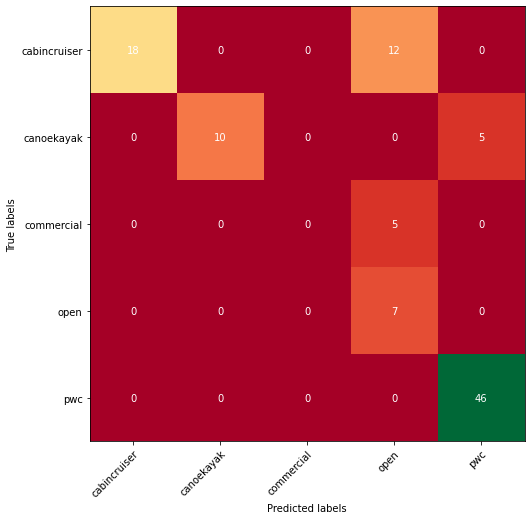

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true, y_pred = data.real_class, data.pred_class_name

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='RdYlGn')

# Add labels and ticks to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticks(np.arange(len(np.unique(y_true))))
ax.set_yticks(np.arange(len(np.unique(y_true))))
ax.set_xticklabels(np.unique(y_true))
ax.set_yticklabels(np.unique(y_true))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text to the plot
for i in range(len(np.unique(y_true))):
    for j in range(len(np.unique(y_true))):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")

# Display the plot
plt.show()

This code generates a confusion matrix plot to visualize the performance of a machine learning model. Here's how it works:

- The true and predicted labels for the test data are retrieved from the `data` DataFrame and stored in `y_true` and `y_pred` variables, respectively.
- The confusion matrix is computed using the `confusion_matrix` function from the Scikit-learn library. This function takes the true labels and predicted labels as input and returns the confusion matrix as a 2D array.
- The `fig, ax = plt.subplots(figsize=(8, 8))` code creates a new figure and axis object to plot the confusion matrix. The `figsize` parameter sets the size of the figure.
- The `imshow` method of the axis object `ax` is used to display the confusion matrix as an image. The `cmap` parameter sets the color map to be used for the plot.
- The `set_xlabel` and `set_ylabel` methods are used to set the labels for the x-axis and y-axis of the plot.
- The `set_xticks` and `set_yticks` methods are used to set the tick locations on the x-axis and y-axis of the plot, respectively.
- The `set_xticklabels` and `set_yticklabels` methods are used to set the tick labels on the x-axis and y-axis of the plot, respectively.
- The `setp` function is used to rotate the x-axis tick labels by 45 degrees to prevent them from overlapping.
- The `text` method of the axis object `ax` is used to add the values of the confusion matrix to the plot.
- Finally, the `show` function is called to display the plot.

### CM Analysis:
- The model could detect 18 out of total 35 cabincruisers right, that means that it's accuracy on predicting cabincruiser were: 51.43%
- The model could detect 10 out of total 15 kayaks right, that means that it's accuracy on predicting kayaks were: 66.67%
- The model couldn't detect any of the 5 commercials right, as it detected them all as Opens.
- The model could detect all of the 7 opens right, that makes its accuracy on detecting opens=100%, although it did miss detected 12 cabincruisers and 5 commercials as opens.
- The model could detect all of the 46 PWCs right, that means that it's accuracy on predicting PWCs were: 100%, althoug it predected 5 of Kayaks as PWCs.

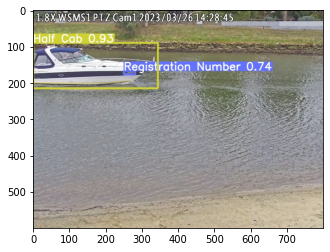

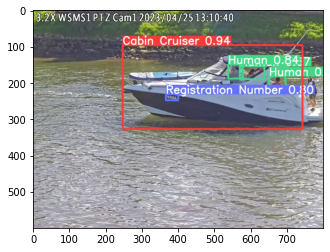

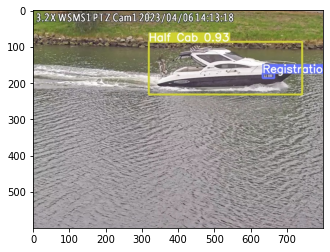

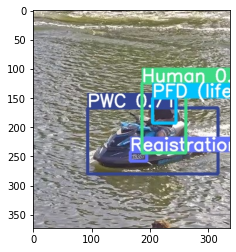

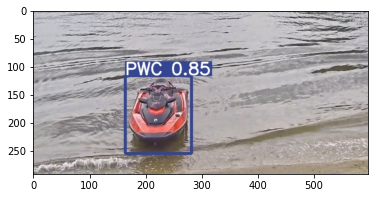

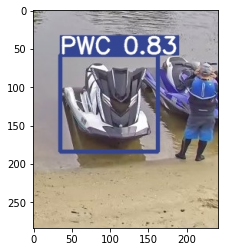

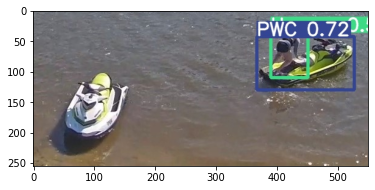

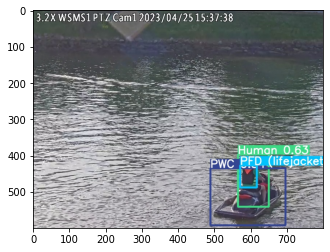

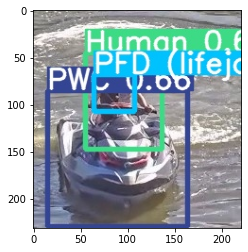

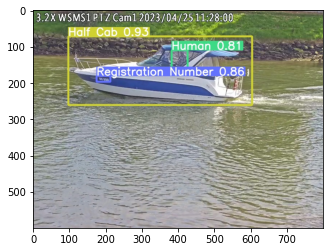

In [ ]:
import matplotlib.pyplot as plt
import os

# Set initial counter to zero
n = 0
# Loop through directories in the detect folder
for d in os.listdir(r'yolov5\runs\detect'):
    # Loop through images in each directory
     for i in os.listdir(os.path.join(r'yolov5\runs\detect',d)):
     
          # Check if image is a jpeg and counter is less than 10
          if n < 10 and i.endswith('.jpg'):
               
               # Read image using matplotlib and display
               img = plt.imread(os.path.join(r'yolov5\runs\detect',d,i))
               plt.imshow(img)
               plt.show()
               
               # Increase counter
               n += 1
          
          # Break out of inner loop if counter is greater than or equal to 10
          else:
               break


This code displays the first 10 JPEG images found in subdirectories of a specific directory using Matplotlib.

First, the code sets an initial counter to zero. Then, it loops through all the directories in the `detect` folder using the `os.listdir` method. Within each directory, it loops through all the images using the same method. 

For each image, the code checks if it is a JPEG file and if the counter is less than 10. If both conditions are met, it reads the image using the `plt.imread` method, displays it using the `plt.imshow` and `plt.show` methods, and increases the counter by 1. 

If the counter is greater than or equal to 10, the code breaks out of the inner loop using the `break` statement. This ensures that only the first 10 JPEG images found in the subdirectories are displayed.

## Results Review:

Based on the accuracy score and confusion matrix, it can be observed that the model did not perform well on the new testing dataset, which is from a different source than the training and validation datasets that was used during the training of the model. To improve the accuracy, we have two potential options:

1. Test the model on a test dataset that is from the same source as the training dataset. However, this has already been done on the validation dataset, which resulted in an excellent accuracy of over 95%. Therefore, this method is not likely to be helpful, especially since the new testing dataset is likely from our main source that the model has been built in the first place to serve it.

2. Retrain the model on data from our main source, after labeling it. We can gather a substantial amount of images (1000-10000) from our main source and label them using an advanced labeling tool. Then, we can fit this data to our YOLO model, which should result in a model that performs excellently on our main source data.

There are many tools that can be used to label images for object detection problems. Here are some popular ones:

1. LabelImg: A graphical image annotation tool that is written in Python and uses Qt for its graphical interface.

2. **RectLabel**: A labeling tool that is designed specifically for object detection tasks on macOS.

3. VoTT: An open-source, web-based tool from Microsoft that allows users to annotate images for object detection.

4. CVAT: An open-source, web-based tool that is designed to help with image and video annotation.

5. **Labelbox**: A cloud-based platform that offers data labeling and management for machine learning.

6. Supervisely: An end-to-end platform for computer vision and deep learning that includes an image annotation tool.

7. **Amazon SageMaker Ground Truth**: A fully managed service that makes it easy to build highly accurate training datasets for machine learning.

8. Dataturks: A data annotation platform that offers various annotation tools, including for object detection.

These are just a few examples of the many tools available for labeling images for object detection. The choice of tool may depend on factors such as the specific requirements of the project, the budget, and the available resources.